In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv("forestfires.csv")

In [6]:
data.head(5)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


# EDA

In [7]:
raw_data=data[['month','day','FFMC','DMC','DC','ISI','temp','RH','wind','rain','area','size_category']]
raw_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [8]:
print(data.shape)
print(raw_data.shape)

(517, 31)
(517, 12)


Descriptive Statistis for Raw-Data

In [9]:
raw_data.isna().sum().sum()

0

In [10]:
raw_data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [13]:
numeric_features=[feature for feature in raw_data.columns if raw_data[feature].dtypes!='O']
print('Numeric features are','\n',numeric_features)

Numeric features are 
 ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [14]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Categorical features are','\n',categorical_features)

Categorical features are 
 ['month', 'day', 'size_category']


In [15]:
raw_data.corr()['area'].sort_values(ascending=False)

area    1.000000
temp    0.097844
DMC     0.072994
DC      0.049383
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

# Visualization

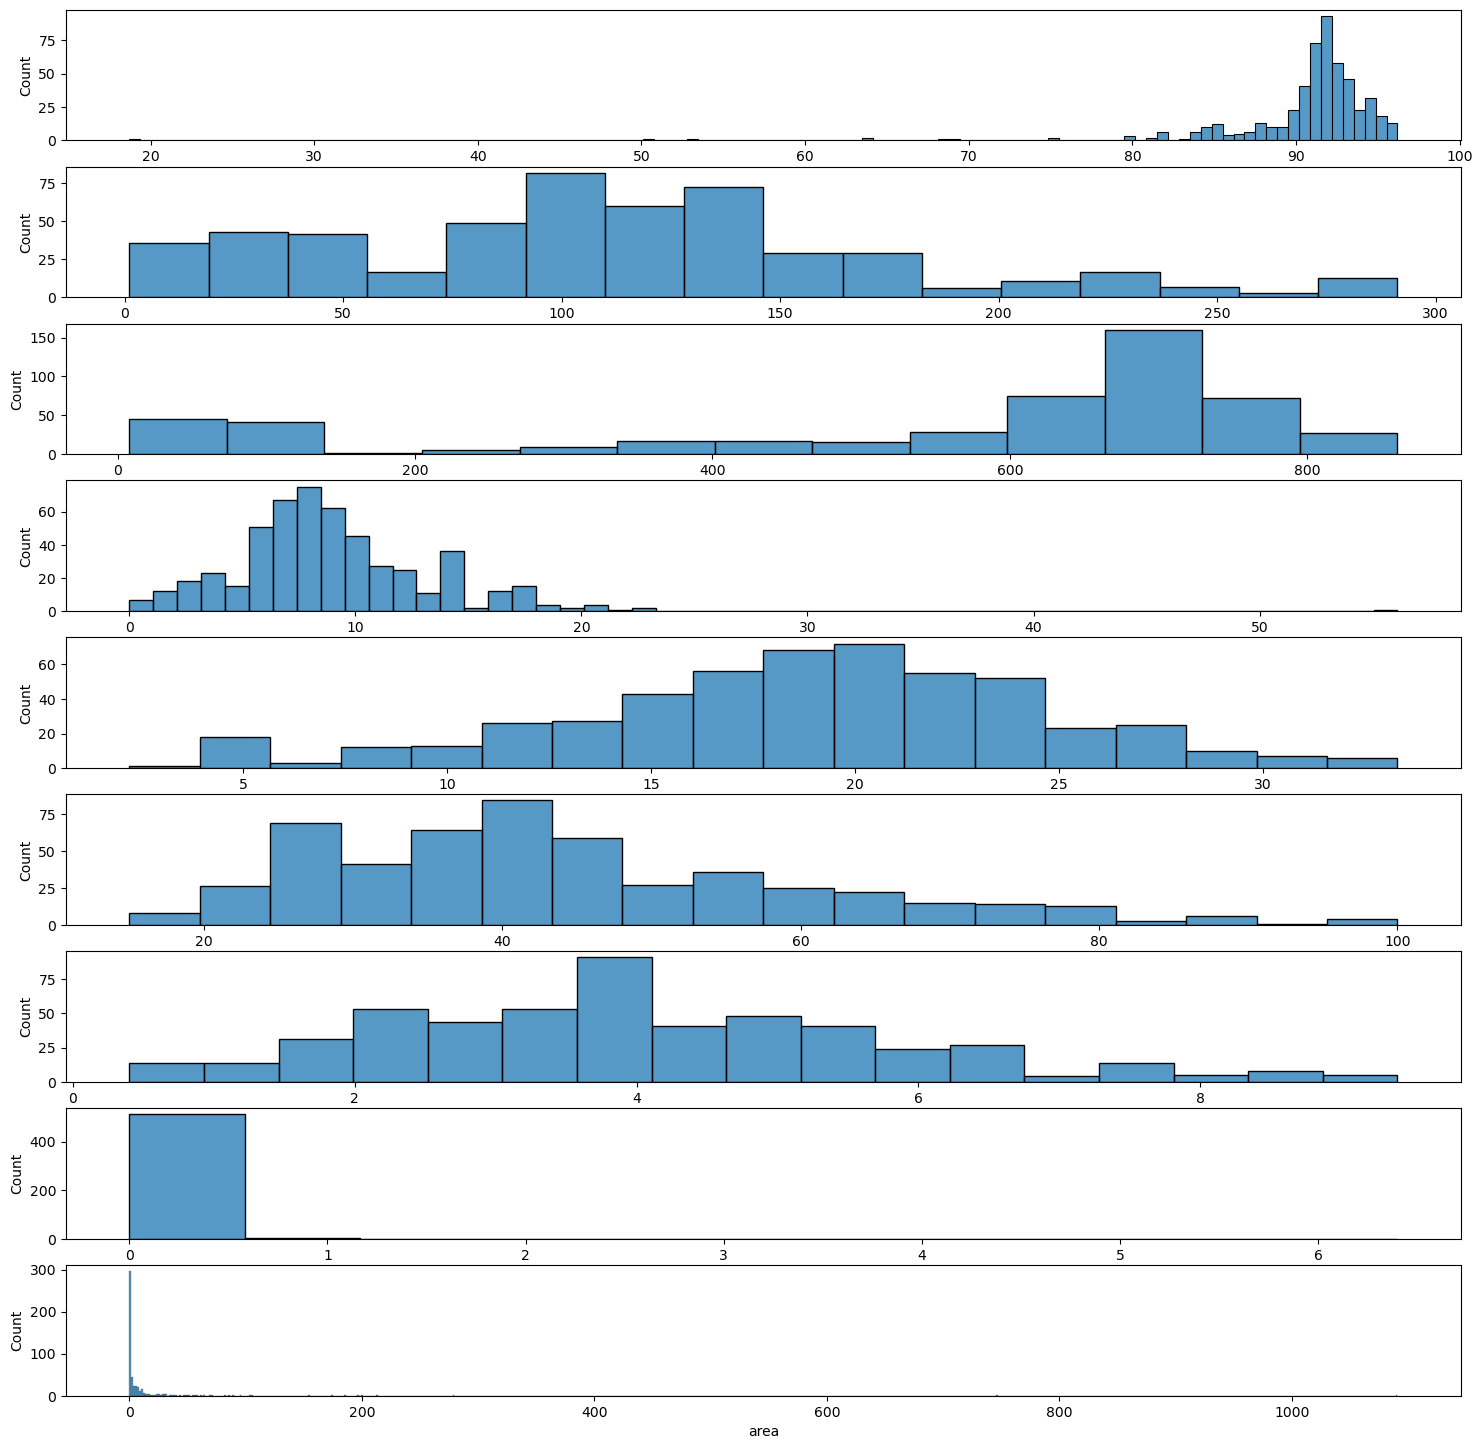

In [16]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(18,18))

for i in range(0,len(numeric_features)):
  sns.histplot(data[numeric_features[i]],ax=axes[i])

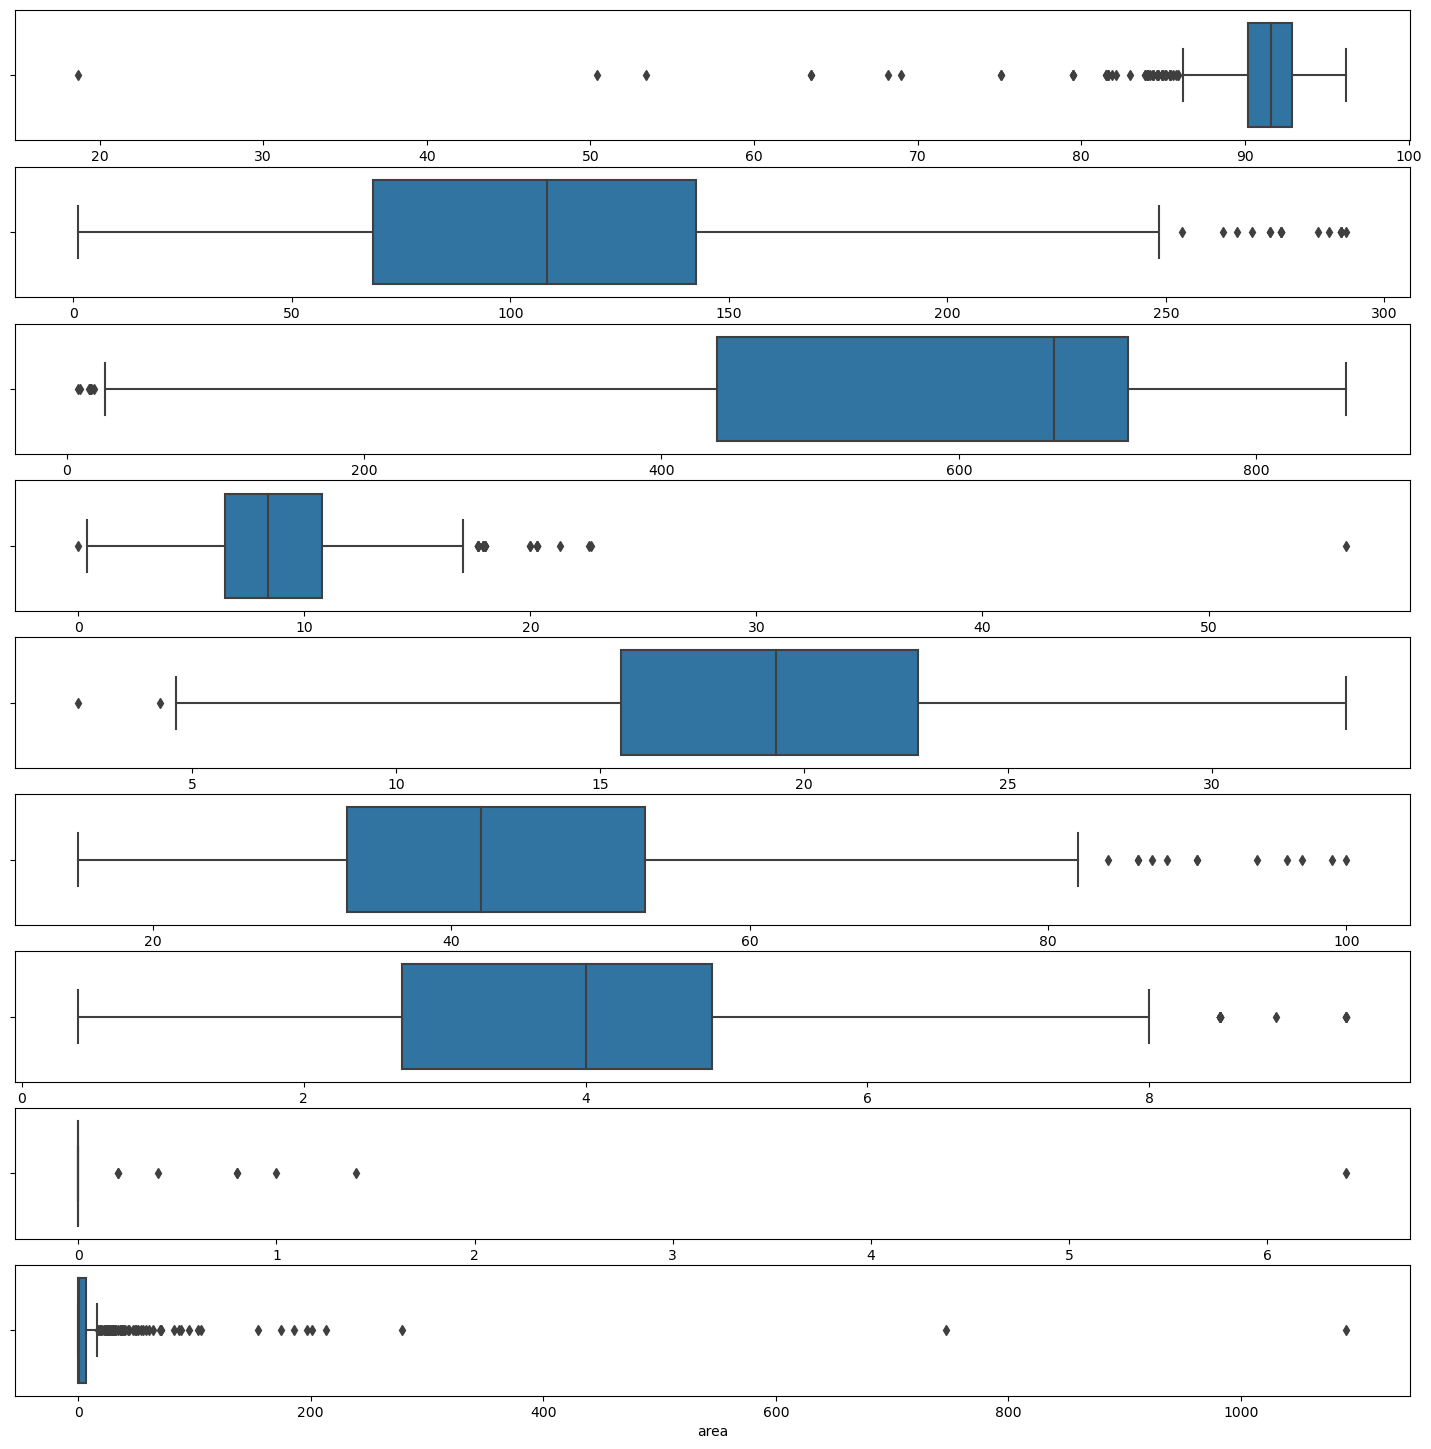

In [17]:
fig,axes=plt.subplots(len(numeric_features),1,figsize=(18,18))

for i in range(0,len(numeric_features)):
  sns.boxplot(data[numeric_features[i]],ax=axes[i])

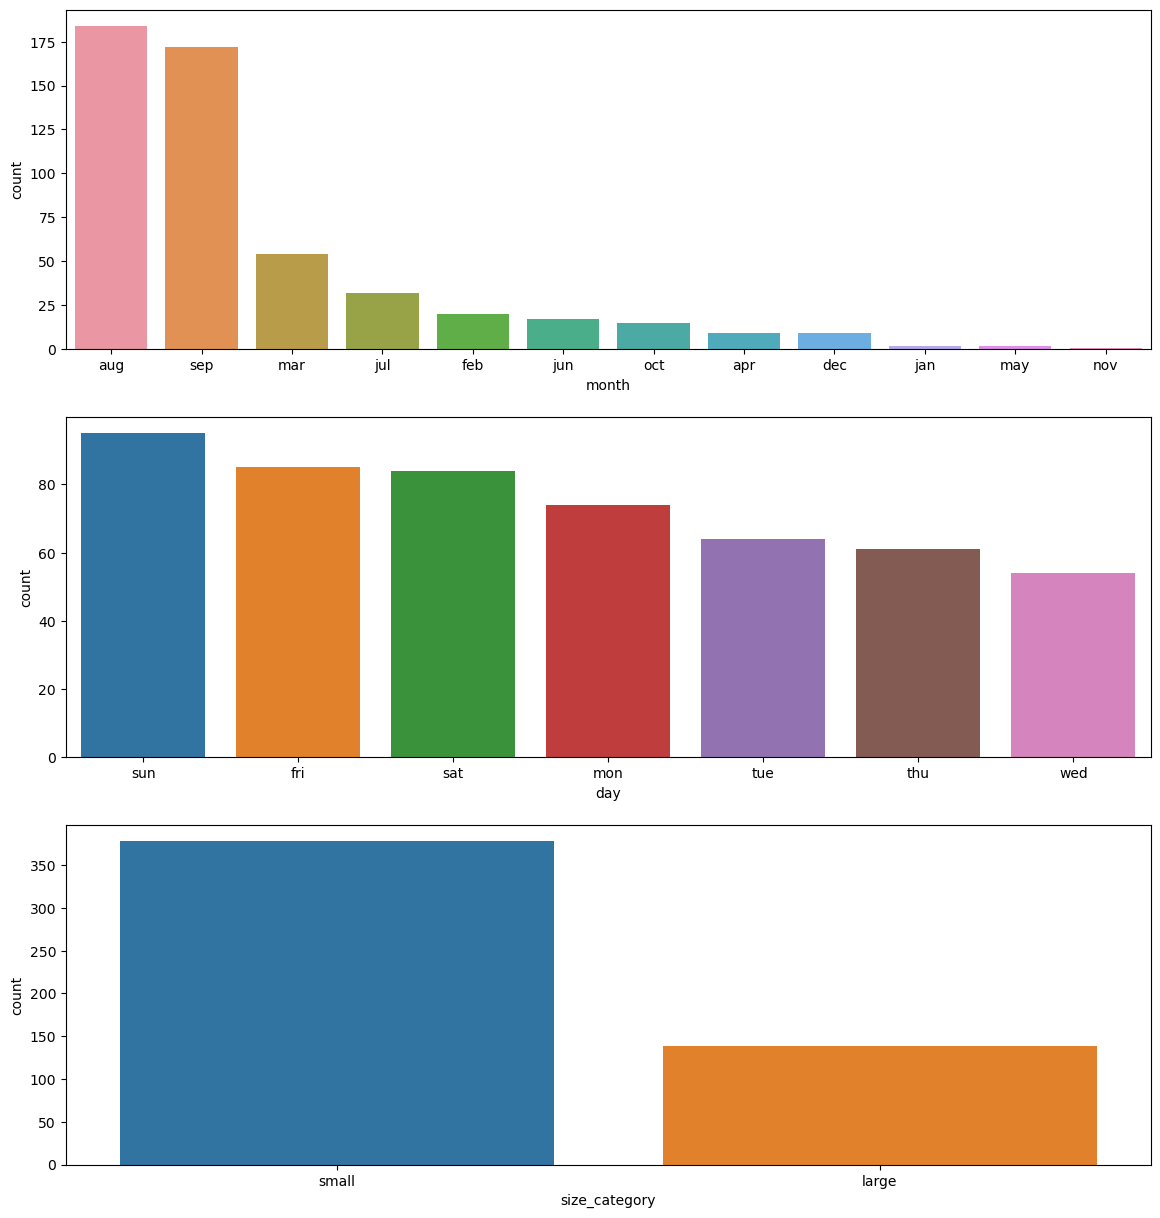

In [18]:
fig, axes=plt.subplots(len(categorical_features),1,figsize=(14,15))

for i in range (0, len(categorical_features)):
    sns.countplot(raw_data[categorical_features[i]],ax=axes[i], order=raw_data[categorical_features[i]].value_counts().index)

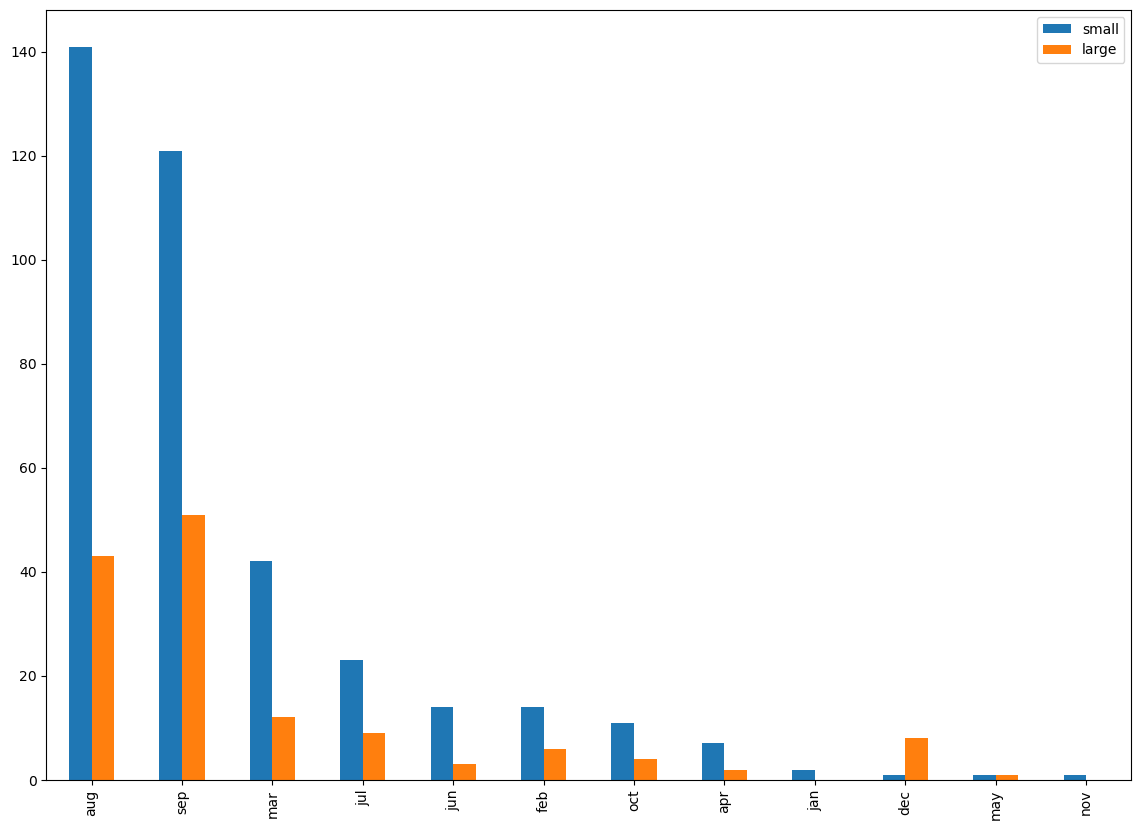

In [19]:
df=pd.DataFrame()

df['small']=raw_data[raw_data['size_category']=='small']['month'].value_counts()
df['large']=raw_data[raw_data['size_category']=='large']['month'].value_counts()

df.plot.bar(figsize=(14,10));

# Data Preprocessing

In [21]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, KFold,cross_val_score,train_test_split

In [22]:
x = data.copy()
x.drop('size_category',axis=1, inplace =True)

y = data[['size_category']]

# Encoding output 
le = LabelEncoder()
y = le.fit_transform(y) 

# small : 1, large: 0.
 
# Inputs are already encoded, just need to drop month and day columns
x.drop(['month' , 'day'] , axis=1, inplace=True)  
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9) 
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (361, 28)
Shape of X_test:  (156, 28)
Shape of y_train:  (361,)
Shape of y_test (156,)


# Building model for ANN

In [24]:
from tensorflow.keras.optimizers import Adam
from keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [25]:
from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [41]:
input_dim=x_train.shape[1]

In [42]:
input_dim

28

In [26]:
model = Sequential()
model.add(Dense(32,input_dim=28,activation='relu')) #input layer
model.add(Dense(64,activation='relu'))
model.add(Dense(96,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(96,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(96,activation="relu"))
model.add(Dense(1,activation="sigmoid")) #output layer

In [27]:
adam=Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=20, validation_split=0.3, epochs = 100, verbose=-1)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

In [31]:
print("Train Accuracy:", model.evaluate(x_train, y_train, verbose=0))


Train Accuracy: [0.09303058683872223, 0.9806094169616699]


In [30]:
print("Test Accuracy:", model.evaluate(x_test, y_test, verbose=0))

Test Accuracy: [0.11332670599222183, 0.9807692170143127]


In [33]:
pred=model.predict(x_test)

In [34]:
pred[:5]

array([[9.7990155e-01],
       [8.9328349e-02],
       [9.9967849e-01],
       [9.9983543e-01],
       [7.5022068e-16]], dtype=float32)

In [35]:
predicted = []
for i in range(0, len(pred)):
    if pred[i]<0.5: #converting prob into 1 or 0
        predicted.append(0)
    else:
        predicted.append(1)

In [36]:
print('Actual y is:',y_test[:5],'\n','Predicted y is:',predicted[:5])

Actual y is: [1 0 1 1 0] 
 Predicted y is: [1, 0, 1, 1, 0]


In [37]:
accuracy=accuracy_score(y_test,predicted)
print('Accuracy of model is:',np.round(accuracy,5))

Accuracy of model is: 0.98077


In [38]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        45
           1       0.98      0.99      0.99       111

    accuracy                           0.98       156
   macro avg       0.98      0.97      0.98       156
weighted avg       0.98      0.98      0.98       156



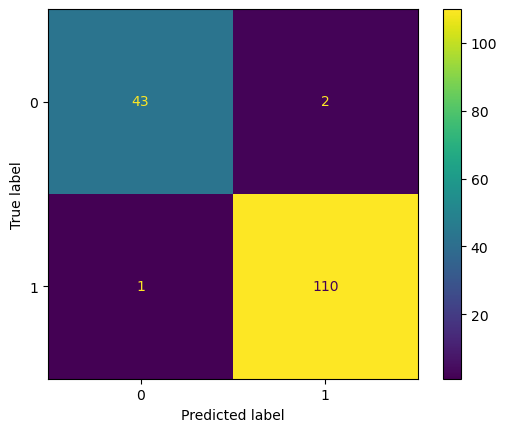

In [39]:
confusion_matrix=confusion_matrix(y_test,predicted)
cm_display=ConfusionMatrixDisplay(confusion_matrix)
cm_display.plot()
plt.plot();